## Análise exploratória dos dados

### Importação das lib e datasets

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
df_bts = pd.read_csv('./data/bts.csv')
df_meds_test_students = pd.read_csv('./data/meds_test_alunos.csv')
df_meds_train_students = pd.read_csv('./data/meds_train_alunos.csv')

### Pré processamento de dados

##### Dados duplicados ou nulos

In [14]:
num_duplicates = df_meds_test_students.duplicated().sum()

print(f"Number of duplicated lines: {num_duplicates}")


Number of duplicated lines: 0


In [15]:
num_duplicates = df_meds_train_students.duplicated().sum()

print(f"Number of duplicated lines: {num_duplicates}")


Number of duplicated lines: 0


In [16]:
null_counts = df_meds_test_students.isnull().sum()

for column, null_count in null_counts.items():
    print(f"{column}: {null_count}")


ponto_id: 0
rssi_1_1: 0
rssi_1_2: 0
rssi_1_3: 0
rssi_2_1: 0
rssi_2_2: 0
rssi_2_3: 0
rssi_3_1: 0
rssi_3_2: 0
rssi_3_3: 0
delay_1: 0
delay_2: 0
delay_3: 0


In [17]:
null_counts = df_meds_train_students.isnull().sum()

for column, null_count in null_counts.items():
    print(f"{column}: {null_count}")


ponto_id: 0
rssi_1_1: 0
rssi_1_2: 0
rssi_1_3: 0
rssi_2_1: 0
rssi_2_2: 0
rssi_2_3: 0
rssi_3_1: 0
rssi_3_2: 0
rssi_3_3: 0
delay_1: 0
delay_2: 0
delay_3: 0
lat: 0
lon: 0
indoor: 0


##### Identificação de outliers

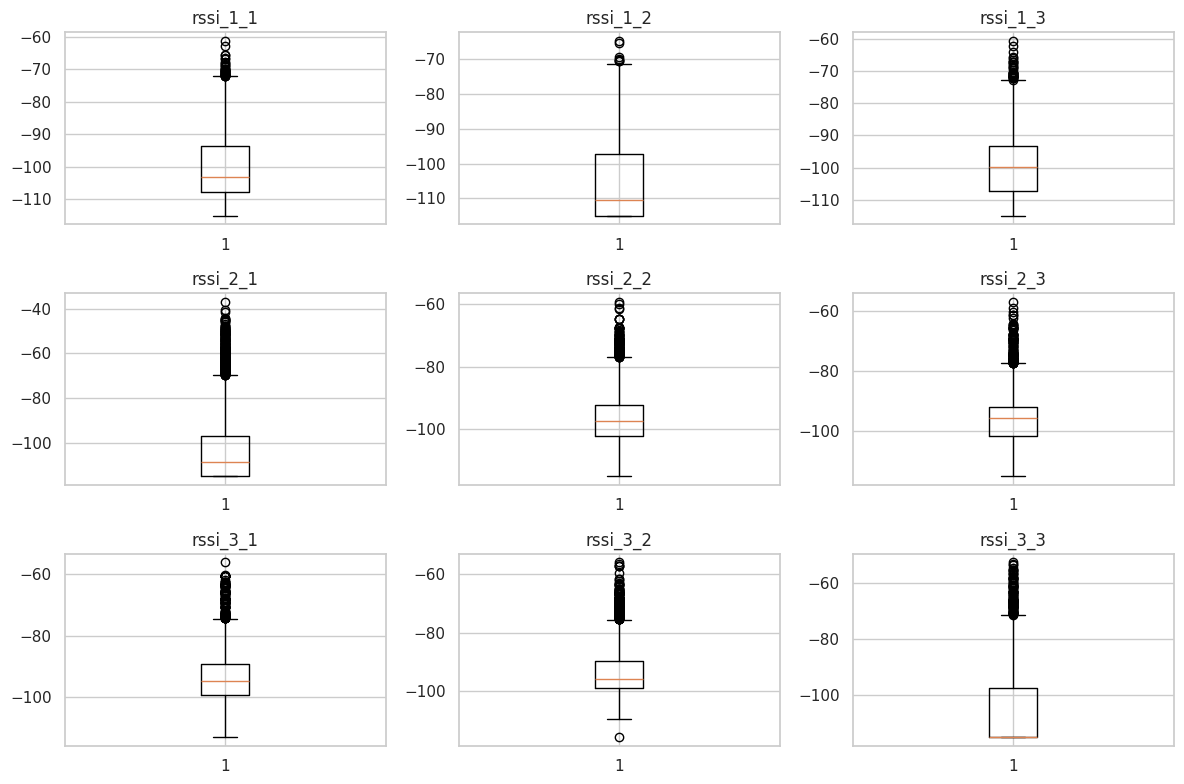

Number of outliers in column rssi_1_1: 37 (0.55%)
Number of outliers in column rssi_1_2: 7 (0.10%)
Number of outliers in column rssi_1_3: 35 (0.52%)
Number of outliers in column rssi_2_1: 220 (3.25%)
Number of outliers in column rssi_2_2: 164 (2.42%)
Number of outliers in column rssi_2_3: 131 (1.93%)
Number of outliers in column rssi_3_1: 142 (2.10%)
Number of outliers in column rssi_3_2: 194 (2.86%)
Number of outliers in column rssi_3_3: 105 (1.55%)


In [18]:
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, start=1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_meds_train_students[col])
    plt.title(col)

plt.tight_layout()
plt.show()

def count_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return outliers.shape[0], outliers.shape[0] / len(column_data) * 100

for col in columns:
    outliers_count, outliers_percentage = count_outliers(df_meds_train_students[col])
    print(f"Number of outliers in column {col}: {outliers_count} ({outliers_percentage:.2f}%)")




##### Tipo de dados

In [19]:
df_meds_train_students['indoor'].value_counts()

indoor
True     4621
False    2154
Name: count, dtype: int64

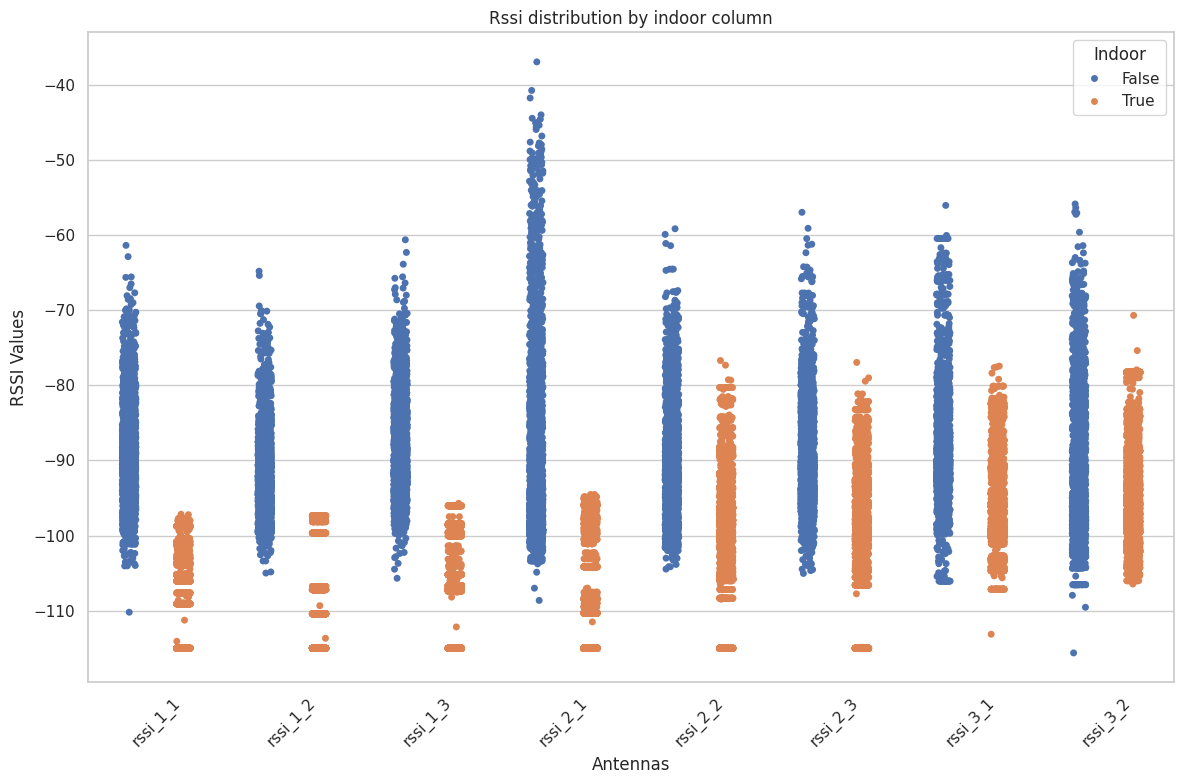

In [23]:
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
df_melted = df_meds_train_students.melt(id_vars=['indoor'], value_vars=columns[:-1], value_name='rssi_values', var_name='antennas')

plt.figure(figsize=(12, 8))
sns.stripplot(x='antennas', y='rssi_values', hue='indoor', data=df_melted, jitter=True, dodge=True)
plt.xlabel('Antennas')
plt.ylabel('RSSI Values')
plt.title('RSSI distribution by indoor column')
plt.xticks(rotation=45)
plt.legend(title='Indoor')
plt.tight_layout()
plt.show()